# 모델 평가와 성능 향상
훈련보다 예측이 중요하다.

## 1. Cross-validation
- 여러번 나누고 여러모델을 학습함
- 대표적으로 k-fold cross-validation


### 1.1 k-fold

In [101]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris = datasets.load_iris()

In [94]:
# logreg = LogisticRegression()
# to remove warning
logreg = LogisticRegression(solver='liblinear',multi_class='ovr')

In [ ]:
#cross validation

cv_score = cross_val_score(logreg,iris.data,iris.target,cv=3)
cv_score

In [ ]:
score_k5 = cross_val_score(logreg,iris.data,iris.target,cv=5)
score_k5

### 1.2 단순한 KFold로 나누었을떄의 문제
- label(y)을 균등하게 나누지 않음

In [8]:
from sklearn.model_selection import KFold

In [16]:
kfold = KFold(n_splits=3)
kfold1 = KFold(n_splits=3,shuffle=True, random_state=0)

In [ ]:
cross_val_score(logreg,iris.data,iris.target,cv=kfold),\
cross_val_score(logreg,iris.data,iris.target,cv=kfold1)

### 1.3 y값에 따라서 균등분할

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

In [98]:
stratified_shuffle_split = StratifiedShuffleSplit(train_size=0.7,test_size=0.3,n_splits=10,random_state=0)
score = cross_val_score(logreg,iris.data,iris.target,cv = stratified_shuffle_split)
score

array([0.97777778, 0.91111111, 0.95555556, 0.91111111, 0.95555556,
       0.93333333, 0.97777778, 0.95555556, 0.97777778, 1.        ])

In [89]:
#split 된 데이터 확인 방법
X = iris.data
y = iris.target

for train_index, test_index in stratified_shuffle_split.split(X, y):
#     print("Train:", train_index, "\n", "Test:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [99]:
np.bincount(y_train)

array([35, 35, 35], dtype=int64)

(array([35.,  0.,  0.,  0.,  0., 35.,  0.,  0.,  0., 35.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

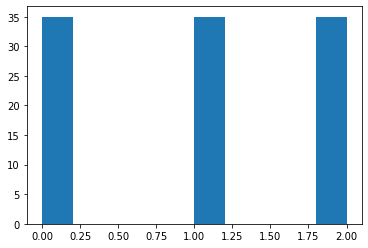

In [102]:
plt.hist(y_train)